# Data preprocessing
Most preprocessing steps were adopted from Markus Bilz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from dateutil.relativedelta import *
from IPython import get_ipython
from pandas_datareader.famafrench import get_available_datasets
from scipy import stats 
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.preprocessing import scale, StandardScaler
from statsmodels.tsa.stattools import adfuller

plt.style.use("seaborn")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
## Define root-path for data source 
root_path = "./data/"

In [2]:
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')

crsp_df = pd.read_csv(f"{root_path}/sample_raw.csv", index_col=["date","permno"], parse_dates=['date'], date_parser=dateparse, skipinitialspace=True)

crsp_df.tail()

NameError: name 'root_path' is not defined

In [4]:
crsp_df.head()

yy  mm       ret     prc      size         q10  \
date       permno                                                     
1962-07-31 19940   1962   7 -0.010899  45.375  491739.0  10760.7000   
           25160   1962   7 -0.039216  36.750   57720.0  10760.7000   
1962-08-31 19940   1962   8  0.104683  50.125  491739.0  11999.4000   
           25160   1962   8  0.027211  37.500   57720.0  11999.4000   
1962-09-30 19940   1962   9 -0.049947  47.250  491739.0  12045.1875   

                          q20        q30       q40       q50       q60  \
date       permno                                                        
1962-07-31 19940   18723.6000  27908.300  41482.65  59289.50  89183.25   
           25160   18723.6000  27908.300  41482.65  59289.50  89183.25   
1962-08-31 19940   20397.0000  31089.750  44646.90  64764.00  97277.50   
           25160   20397.0000  31089.750  44646.90  64764.00  97277.50   
1962-09-30 19940   20484.0625  31935.625  46320.75  67160.25  99550.00   

                         q70       q80        q90  d_shrout         lme  \
date       permno                                                         
1962-07-31 19940   140166.80  254966.4  485669.60 -0.003825  395763.625   
           25160   140166.80  254966.4  485669.60  0.000000   39780.000   
1962-08-31 19940   148232.55  269572.5  518817.70  0.000000  389952.750   
           25160   148232.55  269572.5  518817.70  0.000000   38220.000   
1962-09-30 19940   150647.75  277390.5  529258.25  0.000000  430774.250   

                   lturnover       ldp      beme       at         c        ol  \
date       permno                                                               
1962-07-31 19940    0.002179  0.041129  0.508099  294.987  0.106628  1.445494   
           25160    0.014423  0.026144  1.303222  113.000  0.084071  0.458850   
1962-08-31 19940    0.001815  0.041582  0.508099  294.987  0.106628  1.445494   
           25160    0.015288  0.027211  1.303222  113.000  0.084071  0.458850   
1962-09-30 19940    0.002339  0.037642  0.508099  294.987  0.106628  1.445494   

                        pcm      prof       roe  investment        oa  \
date       permno                                                       
1962-07-31 19940   0.248524  0.483782  0.119756    0.031856  0.113312   
           25160   0.234969  0.203664  0.043196   -0.051217 -0.562380   
1962-08-31 19940   0.248524  0.483782  0.119756    0.031856  0.113312   
           25160   0.234969  0.203664  0.043196   -0.051217 -0.562380   
1962-09-30 19940   0.248524  0.483782  0.119756    0.031856  0.113312   

                    free_cf       noa       roa    debt2p       s2p      d_so  \
date       permno                                                               
1962-07-31 19940   0.132603  0.775854  0.099692  0.006920  0.989076  0.003134   
           25160   0.024195  0.740571  0.026448  0.556133  1.129591  0.000000   
1962-08-31 19940   0.132603  0.775854  0.099692  0.006920  0.989076  0.003134   
           25160   0.024195  0.740571  0.026448  0.556133  1.129591  0.000000   
1962-09-30 19940   0.132603  0.775854  0.099692  0.006920  0.989076  0.003134   

                       a2me       e2p       eps       o2p       nop     dpi2a  \
date       permno                                                               
1962-07-31 19940   0.599885  0.057958  3.303582  0.035244  0.035244  0.042252   
           25160   1.957727  0.054574  3.028846  0.018018  0.018018  0.035264   
1962-08-31 19940   0.599885  0.057958  3.303582  0.035244  0.035244  0.042252   
           25160   1.957727  0.054574  3.028846  0.018018  0.018018  0.035264   
1962-09-30 19940   0.599885  0.057958  3.303582  0.035244  0.035244  0.042252   

                        ivc       rna        pm       ato       cto       tan  \
date       permno                                                               
1962-07-31 19940   0.015890  0.259329  0.113770  2.279411  1.701298  0.604777   
           25160  -

In [5]:
crsp_df.describe()

,yy,mm,ret,prc,size,q10,q20,q30,q40,q50,q60,q70,q80,q90,d_shrout,lme,lturnover,ldp,beme,at,c,ol,pcm,prof,roe,investment,oa,free_cf,noa,roa,debt2p,s2p,d_so,a2me,e2p,eps,o2p,nop,dpi2a,ivc,rna,pm,ato,cto,tan,s2c,c2d,sales_g,d_dgm_dsales,d_ceq,roc,aoa,roic,ipm,sat,q,spread_mean,rel_to_high_price,cum_return_1_0,cum_return_12_7,cum_return_12_2,cum_return_36_13,cum_return_6_2,beta,dto,suv,ret_max,beta_daily,idio_vol,total_vol,std_volume,std_turn,lme_adj,beme_adj,pm_adj,at_adj
count,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06,1.631389e+06
mean,1.993992e+03,6.494834e+00,1.333871e-02,2.843020e+01,1.834808e+06,1.208805e+05,2.465042e+05,4.003002e+05,6.191170e+05,9.302259e+05,1.384658e+06,2.149803e+06,3.898911e+06,8.647062e+06,8.579736e-03,1.960273e+06,9.706201e-02,1.808432e-02,9.004476e-01,3.654742e+03,1.388916e-01,1.050167e+00,-9.135797e-01,1.096785e+00,3.141595e-02,1.558247e-01,1.842718e+00,-3.400616e-01,6.478650e-01,1.711114e-02,8.866939e-01,2.615455e+00,3.804175e-02,3.202035e+00,-1.469747e-02,1.597937e+00,2.919615e-02,4.175006e-03,8.174927e-02,1.288825e-02,-4.317704e+10,-1.370749e+00,-2.106718e+11,1.284754e+00,5.316092e-01,1.088854e+02,1.029734e-01,4.566893e-01,-4.104154e-01,2.213586e-01,-1.208479e+01,6.567378e+00,4.084169e-02,-1.397137e+00,1.141144e+00,1.670648e+00,3.531844e-02,7.413425e-01,1.343507e-02,8.011735e-02,1.503480e-01,3.529930e-01,6.665810e-02,9.827752e-01,2.747317e-04,2.406847e-01,7.343073e-02,8.455328e-01,2.980698e-02,3.190114e-02,2.187445e+05,3.796171e-01,3.360033e+05,1.186692e-02,5.102583e-01,2.026916e-02
std,1.206481e+01,3.455833e+00,1.671166e-01,8.641340e+02,1.114039e+07,1.035414e+05,2.109336e+05,3.298808e+05,4.996389e+05,7.206087e+05,1.026851e+06,1.535298e+06,2.852143e+06,6.608684e+06,1.371968e-01,1.155552e+07,2.055786e-01,8.819527e-02,9.611896e-01,3.674470e+04,1.760821e-01,9.329454e-01,1.045067e+02,4.599407e+01,3.222671e+00,6.508489e-01,2.557628e+03,5.800266e+01,4.972900e-01,2.011790e-01,3.156521e+00,5.202101e+00,1.445300e-01,7.880745e+00,6.092841e-01,5.549267e+01,1.773796e-01,1.679054e-01,2.768822e-01,6.539470e-02,1.531108e+13,1.079974e+02,6.007853e+13,1.213367e+00,1.395916e-01,1.854576e+03,2.000906e+00,3.099186e+01,4.084531e+01,4.028544e+00,1.817144e+03,2.557620e+03,1.438745e-01,1.047918e+02,9.562346e-01,1.825872e+00,6.403691e-02,2.115243e-01,1.665866e-01,4.597096e-01,6.934699e-01,1.251303e+00,4.119699e-01,6.136144e-01,1.299086e-02,3.024645e+00,8.797008e-02,1.743851e+00,2.801267e-02,2.807684e-02,1.708406e+06,1.215166e+00,1.131987e+07,8.637750e-01,1.043895e+02,7.448489e-01
min,1.962000e+03,1.000000e+00,-9.812950e-01,-1.832500e+03,1.500000e+02,9.893400e+03,1.705920e+04,2.651025e+04,3.952400e+04,5.928950e+04,8.918325e+04,1.398669e+05,2.549664e+05,4.856696e+05,-9.920012e-01,4.225000e+01,0.000000e+00,0.000000e+00,1.277311e-04,2.100000e-01,1.051310e-06,-3.414168e-01,-2.932570e+04,-1.799000e+03,-8.222500e+02,-9.808317e-01,-2.632000e+05,-2.116050e+04,-9.062156e+00,-1.981528e+01,0.000000e+00,8.984170e-06,-2.577925e+00,7.317639e-03,-8.176853e+01,-7.713566e+01,-8.973048e+00,-1.524812e+01,-7.420308e+00,-1.689015

In [13]:
print(crsp_df.dtypes)

yy                     int64
mm                     int64
ret                  float64
prc                  float64
size                 float64
q10                  float64
q20                  float64
q30                  float64
q40                  float64
q50                  float64
q60                  float64
q70                  float64
q80                  float64
q90                  float64
d_shrout             float64
lme                  float64
lturnover            float64
ldp                  float64
beme                 float64
at                   float64
c                    float64
ol                   float64
pcm                  float64
prof                 float64
roe                  float64
investment           float64
oa                   float64
free_cf              float64
noa                  float64
roa                  float64
debt2p               float64
s2p                  float64
d_so                 float64
a2me                 float64
e2p           

In [14]:
print(crsp_df.columns)

Index(['yy', 'mm', 'ret', 'prc', 'size', 'q10', 'q20', 'q30', 'q40', 'q50',
       'q60', 'q70', 'q80', 'q90', 'd_shrout', 'lme', 'lturnover', 'ldp',
       'beme', 'at', 'c', 'ol', 'pcm', 'prof', 'roe', 'investment', 'oa',
       'free_cf', 'noa', 'roa', 'debt2p', 's2p', 'd_so', 'a2me', 'e2p', 'eps',
       'o2p', 'nop', 'dpi2a', 'ivc', 'rna', 'pm', 'ato', 'cto', 'tan', 's2c',
       'c2d', 'sales_g', 'd_dgm_dsales', 'd_ceq', 'roc', 'aoa', 'roic', 'ipm',
       'sat', 'q', 'spread_mean', 'rel_to_high_price', 'cum_return_1_0',
       'cum_return_12_7', 'cum_return_12_2', 'cum_return_36_13',
       'cum_return_6_2', 'beta', 'dto', 'suv', 'ret_max', 'beta_daily',
       'idio_vol', 'total_vol', 'std_volume', 'std_turn', 'lme_adj',
       'beme_adj', 'pm_adj', 'at_adj'],
      dtype='object')


In [6]:
print(crsp_df.shape)
# drop identical rows, if present 
crsp_df.drop_duplicates(inplace=True)
print(crsp_df.shape)

(1631389, 76)
(1631389, 76)


In [6]:
print(crsp_df.shape)
# drop identical multi index e. g. date = '1962-01-01' and permno = 2020, if present
crsp_df = crsp_df[~crsp_df.index.duplicated(keep='first')]
print(crsp_df.shape)

(1631389, 76)
(1631389, 76)


In [7]:
missing_per_month = crsp_df.isna().sum()
print(f"No. (isna) {missing_per_month.sum()}")

No. (isna) 0


In [8]:
# check for missing months in multi index
multi_index = crsp_df.index.get_level_values("date")

# create full date range and calculate delta to series from index
missing_dates = pd.date_range(multi_index.min(), multi_index.max(), freq="M").difference(multi_index)

print(f"missing dates: {missing_dates}")

missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq=None)


## Select date range

The dataset is based on Compustat data. Linnamaa and Roberts (p. 1) point out, that Compustat data prior to 1963 can contain a bias due to inconsistent backfilling.

Similar to Freyberger et. al. (p. 3) we restrict to a range starting from July 1963. The last observations are from December 2014, which is the last month included in the dataset.

In [9]:
start = '1963-07-31'
end = '2014-12-29'

print(crsp_df.shape)
crsp_df = crsp_df.loc[pd.IndexSlice[start:end,], :]
print(crsp_df.shape)

(1631389, 76)
(1631365, 76)


## Encode cyclic features as circle

The column `mm` contains the month of the time slice. Months are numbered from $1$ to $12$. Encoding them as a numerical feature is problematic for some ML models as $12$ would be most distant apart from $1$, although they are consecutive months. We use cyclic encoding using an angle to compensate for that.

We leave `yy` as given and keep it in the data set, but transformed to a value with range $0-1$ globally.

In [10]:
# scaling to range starting at zero up to one
crsp_df['yy'] = crsp_df.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis=0)['yy']

In [13]:
crsp_df['mm_sin'] = np.sin((crsp_df['mm']-1)*(2.*np.pi/12))
crsp_df['mm_cos'] = np.cos((crsp_df['mm']-1)*(2.*np.pi/12))

# drop yy and mm column as its part of the index. Former student removed both. Investigate impact
crsp_df.drop(columns=['mm'], inplace=True)
crsp_df.head()

yy       ret     prc        size        q10        q20  \
date       permno                                                            
1963-07-31 19940   0.0 -0.033175  51.000  470521.500  13602.800  23952.700   
           25160   0.0 -0.017544  42.000   36790.000  13602.800  23952.700   
           25478   0.0  0.040984  15.875   50487.375  13602.800  23952.700   
1963-08-31 19940   0.0  0.009804  51.500  470521.500  13597.925  23727.925   
           25160   0.0  0.154762  48.250   36790.000  13597.925  23727.925   

                       q30       q40       q50        q60       q70  \
date       permno                                                     
1963-07-31 19940   36167.7  48601.20  71970.75  104479.95  172212.0   
           25160   36167.7  48601.20  71970.75  104479.95  172212.0   
           25478   36167.7  48601.20  71970.75  104479.95  172212.0   
1963-08-31 19940   34981.1  49579.75  71456.00  103633.50  171624.8   
           25160   34981.1  49579.75  71456.00  103633.50  171624.8   

                          q80        q90  d_shrout        lme  lturnover  \
date       permno                                                          
1963-07-31 19940   317392.575  617581.35       0.0  453333.50   0.001489   
           25160   317392.575  617581.35       0.0   44460.00   0.024904   
           25478   317392.575  617581.35       0.0   60984.75   0.009777   
1963-08-31 19940   318771.725  641561.60       0.0  438294.00   0.001245   
           25160   318771.725  641561.60       0.0   43680.00   0.013654   

                        ldp      beme       at         c        ol       pcm  \
date       permno                                                              
1963-07-31 19940   0.035185  0.552585  307.588  0.075396  1.438180  0.256399   
           25160   0.023392  2.140446  130.100  0.070715  0.386549  0.230866   
           25478   0.027390  0.111355    7.191  0.696982  0.388263  0.709807   
1963-08-31 19940   0.036392  0.552585  307.588  0.075396  1.438180  0.256399   
           25160   0.023810  2.140446  130.100  0.070715  0.386549  0.230866   

                       prof       roe  investment        oa   free_cf  \
date       permno                                                       
1963-07-31 19940   0.500306  0.119883    0.042717  0.621762  0.134383   
           25160   0.186166  0.040015    0.151327 -0.523912  0.013842   
           25478   0.757026  0.374098    0.047030 -0.062019  0.383493   
1963-08-31 19940   0.500306  0.119883    0.042717  0.621762  0.134383   
           25160   0.186166  0.040015    0.151327 -0.523912  0.013842   

                        noa       roa    debt2p       s2p      d_so      a2me  \
date       permno                                                               
1963-07-31 19940   0.812788  0.101540  0.006270  1.078246 -0.003948  0.653717   
           25160   0.932664  0.026637  1.277521  1.726013  0.000000  3.536287   
           25478   0.083285  0.294409  0.000000  0.118762  0.000000  0.142432   
1963-08-31 19940   0.812788  0.101540  0.006270  1.078246 -0.003948  0.653717   
           25160   0.932664  0.026637  1.277521  1.726013  0.000000  3.536287   

                        e2p       eps       o2p       nop     dpi2a       ivc  \
date       permno                                                               
1963-07-31 19940   0.063659  3.485339  0.037560  0.037560  0.069715  0.035106   
           25160   0.081816  2.894231  0.028269  0.028269  0.069912  0.002468   
           25478   0.040050  0.505626  0.035652  0.035652  0.027228  0.013514   
1963-08-31 19940   0.063659  3.485339  0.037560  0.037560  0.069715  0.035106   
           25160   0.081816  2.894231  0.028269  0.028269  0.069912  0.002468   

                        rna        pm       ato       cto       tan  \
date       permno                                                     
1963-07-31 19940   0.271343  0.118233  2.294993  1.719866  0.593991   
           25160   0

## Firm as feature

In [14]:
# use permno as feature
crsp_df['stock'] = crsp_df.index.get_level_values("permno").values

## Removal of survivorship bias

Whenever new stocks are added to the data set, the data provider adds at max. 24 month history through backfilling. (Fama and French 1993; p. 9)

There must be at least 24 datapoints per `permno` to be included in the dataset.

In [15]:
#%%script false --no-raise-error
print(crsp_df.shape)

crsp_df["count"] = crsp_df.groupby(["permno"])["ret"].transform("count")
crsp_df = crsp_df[crsp_df['count']>=24]
crsp_df.drop(columns=["count"], axis=1, inplace=True)

print(crsp_df.shape)

(1631365, 78)
(1596711, 78)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12680\1161211849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_df.drop(columns=["count"], axis=1, inplace=True)


## Change Sign of Columns

Stockprices are $\geq 0$. The price column `prc` contains a leading dash to indicate that a monthly closing price was not available and the price was estimated from bid and ask prices (CRSP; p. 74). 

Interpreting the dash a minus can lead to issues in the further analysis. It is therefore removed. For other columns the sign seems plausible. In previous works this this transformation wasn't applied.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12680\1930378612.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_df["prc"] = crsp_df["prc"].abs()


<AxesSubplot:title={'center':'permno: 17778 after change'}, xlabel='date'>

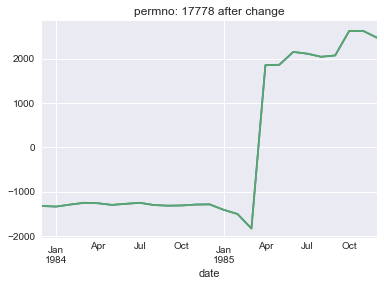

In [16]:
prc_counts = crsp_df["prc"].value_counts().sort_index()

neg_price = crsp_df[crsp_df["prc"] == -1832.5]
# neg_price.head()

permno = 17778
sample_permno = crsp_df.xs(permno, level='permno')
sample_permno['1983-12-31':'1985-12-31']['prc'].plot(title=f"permno: {permno} with negative price")

# remove negative sign if no closing price was available
crsp_df["prc"] = crsp_df["prc"].abs()

sample_permno['1983-12-31':'1985-12-31']['prc'].plot(title=f"permno: {permno} after change")

## Removal of very small prices

As suggested by Ince and Porter (p. 474) and Freyberger et. al. (p. 26) we remove stocks with very small prices from the data set to decrease errors in the data estimation.

In [17]:
#%%script false --no-raise-error
print(crsp_df.shape)

# compare no. observations with Freyberger. Freyberger have 656,067 observations from Jan. 1991-2014 (p.61)
# and drop all prices below 5 USD (p. 26). We drop all stocks where the mean price is below 5 USD. 
# As the criterion for Freyberger is rather unprecise, we chose the average. 

crsp_df["mean_prc"] = crsp_df.groupby(["permno"])["prc"].transform("mean")

# # create subset for cross check
removed = crsp_df[crsp_df['mean_prc']<=5]

# # remove stocks below threshold
crsp_df = crsp_df[crsp_df['mean_prc']>5]

crsp_df.drop(columns=["mean_prc"], axis=1, inplace=True)

print(crsp_df.shape)

(1596711, 78)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12680\3120195983.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_df["mean_prc"] = crsp_df.groupby(["permno"])["prc"].transform("mean")


(1355747, 78)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12680\3120195983.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_df.drop(columns=["mean_prc"], axis=1, inplace=True)


<AxesSubplot:title={'center':'removed permno: 10014'}, xlabel='date'>

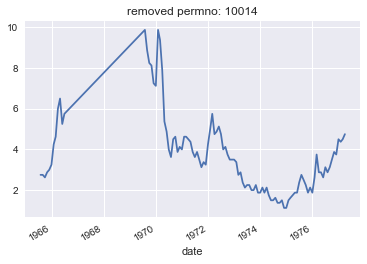

In [18]:
#%%script false --no-raise-error
# cross check removed permno
permno = 10014
sample_removed = removed.xs(permno, level='permno')

sample_removed['prc']['1965-01-01':'2005-01-01'].plot(title=f"removed permno: {permno}")


In [19]:
#%%script false --no-raise-error
removed.head()

yy       ret    prc     size         q10        q20  \
date       permno                                                              
1965-07-31 10014   0.039216  0.100000  2.750  8422.50  17434.3875  28539.525   
1965-08-31 10014   0.039216  0.000000  2.750  8422.50  18383.2000  29268.750   
           32600   0.039216  0.103448  4.000  3183.75  18383.2000  29268.750   
1965-09-30 10014   0.039216 -0.045455  2.625  8422.50  19092.1250  30653.000   
           32600   0.039216  0.125000  4.500  3183.75  19092.1250  30653.000   

                        q30      q40        q50         q60         q70  \
date       permno                                                         
1965-07-31 10014   41004.65  59783.7  85645.125  123944.750  201256.575   
1965-08-31 10014   41798.70  60825.0  87749.375  129691.375  204836.250   
           32600   41798.70  60825.0  87749.375  129691.375  204836.250   
1965-09-30 10014   43368.30  65316.0  91630.000  137819.000  213128.100   
           32600   43368.30  65316.0  91630.000  137819.000  213128.100   

                          q80        q90  d_shrout       lme  lturnover  \
date       permno                                                         
1965-07-31 10014   375748.500  746243.55       0.0  8422.500   0.024785   
1965-08-31 10014   384349.500  760385.60       0.0  9264.750   0.010686   
           32600   384349.500  760385.60       0.0  3077.625   0.010247   
1965-09-30 10014   402699.825  783168.45       0.0  9264.750   0.018314   
           32600   402699.825  783168.45       0.0  3396.000   0.004711   

                        ldp      beme    at         c        ol       pcm  \
date       permno                                                           
1965-07-31 10014   0.000000  1.601069  25.8  0.062016  1.399225  0.175890   
1965-08-31 10014   0.000000  1.601069  25.8  0.062016  1.399225  0.175890   
           32600   0.027586  0.908363   3.6  0.305556  1.772222  0.101408   
1965-09-30 10014   0.000000  1.601069  25.8  0.062016  1.399225  0.175890   
           32600   0.025000  0.908363   3.6  0.305556  1.772222  0.101408   

                       prof       roe  investment        oa   free_cf  \
date       permno                                                       
1965-07-31 10014   0.476085 -0.019746   -0.019011 -0.009682  0.037078   
1965-08-31 10014   0.476085 -0.019746   -0.019011 -0.009682  0.037078   
           32600   0.248963  0.126113    0.028571 -0.154867  0.131397   
1965-09-30 10014   0.476085 -0.019746   -0.019011 -0.009682  0.037078   
           32600   0.248963  0.126113    0.028571 -0.154867  0.131397   

                        noa       roa    debt2p       s2p      d_so      a2me  \
date       permno                                                               
1965-07-31 10014   0.297338 -0.010646  1.118433  4.333630  0.022810  3.063224   
1965-08-31 10014   0.297338 -0.010646  1.118433  4.333630  0.022810  3.063224   
           32600  -0.314286  0.097143  0.000000  2.230075 -0.000618  1.130742   
1965-09-30 10014   0.297338 -0.010646  1.118433  4.333630  0.022810  3.063224   
           32600  -0.314286  0.097143  0.000000  2.230075 -0.000618  1.130742   

                        e2p       eps       o2p       nop     dpi2a       ivc  \
date       permno                                                               
1965-07-31 10014  -0.033244 -0.083111  0.000000  0.000000 -0.041825 -0.069098   
1965-08-31 10014  -0.033244 -0.083111  0.000000  0.000000 -0.041825 -0.069098   
           32600   0.106792  0.400471  0.025128  0.025128  0.000000  0.000000   
1965-09-30 10014  -0.033244 -0.083111  0.000000  0.000000 -0.041825 -0.069098   
           32600   0.106792  0.400471  0.025128  0.025128  0.000000  0.000000   

                        rna        pm       ato       cto       tan  \
date       permno                                                     
1965-07-31 10014  -0.019119 -0.010411  1.836386  1.387833  0.496686   
1965-08-31 

## Removal of extreme reverting returns

A less intrusive approach for outlier removal in returns can be found in Ince and Porter. The authors suggest the following treatment:

If $R_{t}$ or $R_{t-1}$ is greater than \(300 \%\) and $\left(1+R_{t}\right)\left(1+R_{t-1}\right)-1$ is less than \(50 \%\), we set $R_{t}$ and $R_{t-1}$ to missing.

The threshold of \(300 \%\) is abitarly chosen. Instead of setting the returns $R_{t}$ and $R_{t-1}$ to missing, we replace them with their median.

In [21]:
def remove_outlier(x, threshold_ret, threshold_rev):
    # check if group has abs ret > threshold
    if (x.abs() > threshold_ret).any():

        # reuse same ret, if there is no prev day / prev return
        t_1 = x.index[0]
        r_t_1 = x.loc[t_1]

        for t, r_t in x.iteritems():

            if (max(abs(r_t), abs(r_t_1)) > threshold_ret) and (1+r_t) * (1+r_t_1)-1 < threshold_rev:
                # replace with median, if condition holds
                x.loc[t] = x.median()
                x.loc[t_1] = x.median()
            r_t_1 = r_t
            t_1 = t
    return x

In [22]:
sample_high_re = crsp_df[crsp_df['ret']>3].index.get_level_values('permno')

print(sample_high_re)

Int64Index([58481, 41515, 48565, 54439, 61372, 67336, 65816, 11174, 53154,
            75435, 76228, 53154, 60003, 63239, 56557, 11278, 78050, 81566,
            81281, 81595, 43757, 45306, 75581, 79381, 76614, 78134, 79400,
            80763, 82281, 65008, 81624, 12024, 47619, 83398, 84525, 83875,
            33823, 86178, 85986, 78051, 11154, 77967, 81654, 83929, 88335,
            45487, 76904, 67942, 75261, 91184, 75578, 77158, 32636],
           dtype='int64', name='permno')


<AxesSubplot:title={'center':'outlier return of permno: 58481'}, xlabel='date'>

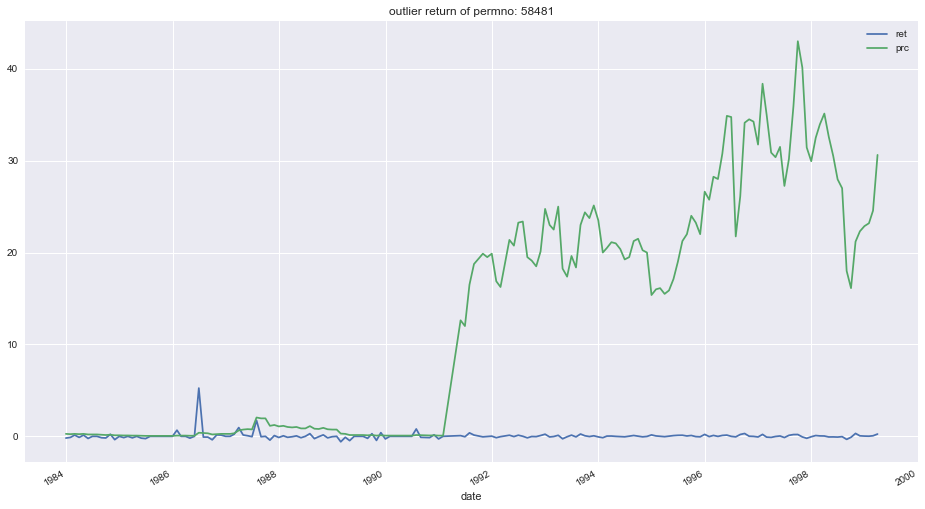

In [23]:
permno = sample_high_re[0]
sample_high_ret = crsp_df.xs(permno, level='permno')
sample_high_ret[['ret', 'prc']].plot(title=f"outlier return of permno: {permno}", figsize=(16,9))

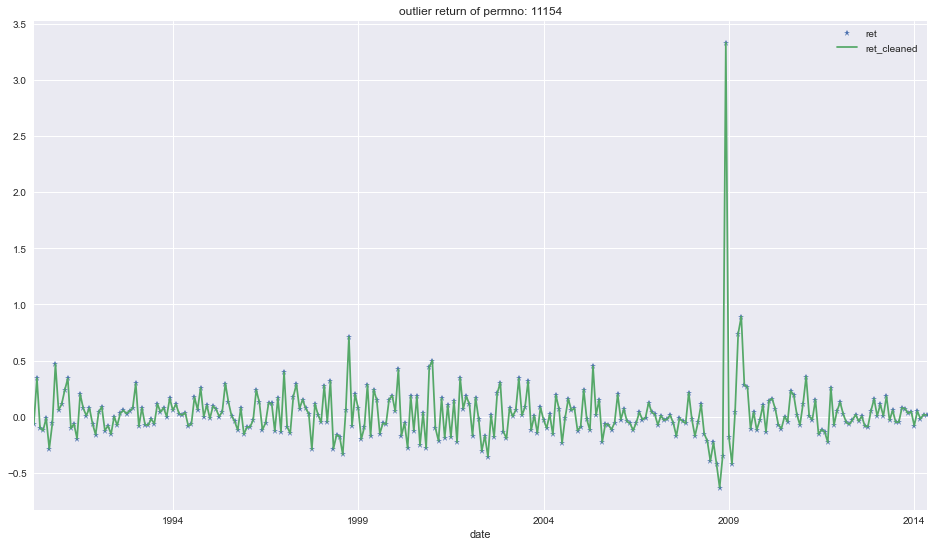

In [27]:
crsp_df['ret_cleaned'] = crsp_df.groupby('permno', sort=False)['ret'].transform(lambda x: remove_outlier(x, threshold_ret=2.00, threshold_rev=0.2))

# draw graph for selected permno
permno = 11154
sample_high_ret = crsp_df.xs(permno, level='permno')

sample_high_ret[['ret', 'ret_cleaned']].plot(title=f"outlier return of permno: {permno}", style=['*','-'], figsize=(16,9))

# replace original return with outlier free return
crsp_df['ret'] =crsp_df['ret_cleaned']
crsp_df.drop(columns=['ret_cleaned'], inplace=True)

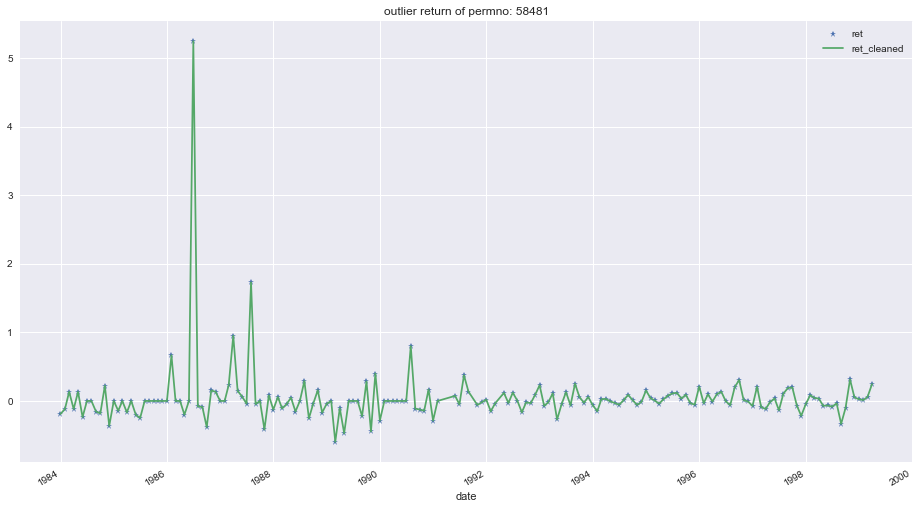

In [28]:
crsp_df['ret_cleaned'] = crsp_df.groupby('permno', sort=False)['ret'].transform(lambda x: remove_outlier(x, threshold_ret=2.00, threshold_rev=0.2))

# draw graph for selected permno
permno = 58481
sample_high_ret = crsp_df.xs(permno, level='permno')

sample_high_ret[['ret', 'ret_cleaned']].plot(title=f"outlier return of permno: {permno}", style=['*','-'], figsize=(16,9))

# replace original return with outlier free return
crsp_df['ret'] =crsp_df['ret_cleaned']
crsp_df.drop(columns=['ret_cleaned'], inplace=True)

In [29]:
crsp_df['ret'].isna().sum()

0

## Isolate target

In [30]:
print(crsp_df.shape)

# use next months (e. g. july) return as this months target (e. g. in june)
crsp_df['TARGET'] = crsp_df.groupby(level='permno')['ret'].shift(-1)

# see indices without consecutive month
inds = np.where(crsp_df['TARGET'].isnull())[0]
print(inds)

# crsp_df.xs(19940, level=1, drop_level=False).tail(10)

# drop final observation as there is no target per permno
crsp_df.dropna(subset=["TARGET"], inplace=True)

print(crsp_df.shape)

(1355747, 78)
[  14256   17414   17446 ... 1355744 1355745 1355746]
(1347287, 79)


In [31]:
# check against Freyberger
START = pd.Timestamp("1990-12-29")

# Note: That true end is in April 2014 (predicting May 2014)
END = pd.Timestamp("2014-04-30")

no_observations = crsp_df.loc[START:END]

print(f"First: {no_observations.index.min()[0]}, last: {no_observations.index.max()[0]}")

# we apply some scaling as  true end is earlier than in freyberger paper
print(f"No. observations in DF in oos set: {len(no_observations.index):0.0f}, (estimated) {len(no_observations.index) * 282/281:0.0f}")

# with dropping all stocks below 5 usd
# No. observations in DF in oos set: 840946, (estimated) 843939

First: 1990-12-31 00:00:00, last: 2014-04-30 00:00:00
No. observations in DF in oos set: 829379, (estimated) 832331


## Scale / Standardize 🧫

Following Gu et. al. (p. 2,248) we scale all features period-by-period to a range of $\left[-1,1\right]$. The `TARGET` will be scaled, as some approaches work better with a scaled targets. To transfer the target back for evaluation the scalers are saved in a series and written to a `.pkl` file. 

Former student also applied min-max scaling for most of the characteristics, but not for the target `ret`. (see `1_Data_exploration_and_preprocessing.ipynb`). Standardization was then applied for the features and the target on a global basis (See `2_Model_estimation.ipynb`). 

As shown in notebook `01_investigate_data.ipynb` rankwise min-max scaling can negatively affect the quality of the data esspecially for neural networks, that work best with zero mean and standard variance. After investigation in the same notebook, we also avoid double scaling of temporal features such as `yy`, `mm_cos` or `mm_sin`, that leads to the variables being constant after rank-wise scaling ⚠️.

We decided to save a DataFrame where rank-wise scaling is applied to all characteristics and the target and one where no scaling of the target is applied. A comparsion of the impact of scaling on the target can be found in `01-investigate-scaling.ipynb`.

In [32]:
# 62 features studied in freyberger paper p. 2364

features_given = [
    'cum_return_1_0', 'cum_return_6_2', 'cum_return_12_2', 'cum_return_12_7', 'cum_return_36_13', 
    'investment', 'd_ceq', 'dpi2a', 'd_shrout', 'ivc', 'noa', 
    'ato', 'cto', 'd_dgm_dsales', 'eps', 'ipm', 'pcm', 'pm', 'pm_adj', 'prof', 'rna', 'roa', 'roc', 'roe', 'roic', 's2c', 'sat', 'at_adj', 
    'aoa', 'ol', 'tan', 'oa', 
    'a2me', 'beme', 'beme_adj', 'c', 'c2d', 'd_so', 'debt2p', 'e2p', 'free_cf', 'ldp', 'nop', 'o2p', 'q', 's2p', 'sales_g', 
    'at', 'beta', 'beta_daily',  'dto', 'idio_vol', 'lme', 'lme_adj', 'lturnover', 'rel_to_high_price', 'ret_max', 'spread_mean', 'std_turn', 'std_volume', 'suv', 'total_vol']

# other relevant columns such as Target or new features, might be removed later again
other_relevant = ["TARGET", "ret", "yy", "mm_cos","mm_sin", "stock"]

features_given.extend(other_relevant)

In [33]:
# Scale all variables
# For discussion on scaling the target see: https://stats.stackexchange.com/a/391354
features_incl_target = features_given
print(features_incl_target)

# Compare with original target
features_excl_target = features_incl_target.copy()
features_excl_target.remove("TARGET")

print(features_excl_target)

# remove all temporal features to prevent them from being encoded
features_incl_target.remove("yy")
features_incl_target.remove("mm_cos")
features_incl_target.remove("mm_sin")

# remove permno since there is no sense in standardizing it

def save_scaler(x):
    """
    save scaler in series for rankwise back-transformation
    """  
    standard_scaler = StandardScaler()
    standard_scaler.fit(x)
    return standard_scaler

# save normalizer to series, this is required for transforming the target back after
scaler = crsp_df.groupby('date', sort=False)[["TARGET"]].apply(save_scaler)
scaler.to_pickle(f"{root_path}/rank_standard_scaler.pkl")


# use unaltered target
crsp_df_normalized_wo_target = crsp_df.groupby('date', sort=False)[features_excl_target].transform(lambda x: scale(x))
crsp_df_normalized_wo_target['TARGET'] = crsp_df['TARGET']
# add temporal features back in
crsp_df_normalized_wo_target['yy'] = crsp_df['yy']
crsp_df_normalized_wo_target['mm_cos'] = crsp_df['mm_cos']
crsp_df_normalized_wo_target['mm_sin'] = crsp_df['mm_sin']

['cum_return_1_0', 'cum_return_6_2', 'cum_return_12_2', 'cum_return_12_7', 'cum_return_36_13', 'investment', 'd_ceq', 'dpi2a', 'd_shrout', 'ivc', 'noa', 'ato', 'cto', 'd_dgm_dsales', 'eps', 'ipm', 'pcm', 'pm', 'pm_adj', 'prof', 'rna', 'roa', 'roc', 'roe', 'roic', 's2c', 'sat', 'at_adj', 'aoa', 'ol', 'tan', 'oa', 'a2me', 'beme', 'beme_adj', 'c', 'c2d', 'd_so', 'debt2p', 'e2p', 'free_cf', 'ldp', 'nop', 'o2p', 'q', 's2p', 'sales_g', 'at', 'beta', 'beta_daily', 'dto', 'idio_vol', 'lme', 'lme_adj', 'lturnover', 'rel_to_high_price', 'ret_max', 'spread_mean', 'std_turn', 'std_volume', 'suv', 'total_vol', 'TARGET', 'ret', 'yy', 'mm_cos', 'mm_sin', 'stock']
['cum_return_1_0', 'cum_return_6_2', 'cum_return_12_2', 'cum_return_12_7', 'cum_return_36_13', 'investment', 'd_ceq', 'dpi2a', 'd_shrout', 'ivc', 'noa', 'ato', 'cto', 'd_dgm_dsales', 'eps', 'ipm', 'pcm', 'pm', 'pm_adj', 'prof', 'rna', 'roa', 'roc', 'roe', 'roic', 's2c', 'sat', 'at_adj', 'aoa', 'ol', 'tan', 'oa', 'a2me', 'beme', 'beme_adj', '

c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. Th

In [47]:
# save scaler for train data X
print(crsp_df.shape)
crsp_wo_target = crsp_df.copy().drop("TARGET", axis=1)
print(crsp_wo_target.shape)
scaler = crsp_wo_target.groupby('date', sort=False).apply(save_scaler)
scaler.to_pickle(f"{root_path}/rank_standard_scaler_x.pkl")

(1347287, 79)
(1347287, 78)


## Store results

In [29]:
### Store complete preprocessed data set
crsp_df_normalized_wo_target.to_pickle(f"{root_path}/data_processed_scaled.pkl")

In [22]:
### Alternatively as csv for GDrive
crsp_df_normalized_wo_target.to_csv(f"{root_path}/data_processed_scaled.csv")

In [55]:
print(permnos)

Int64Index([19940, 25160, 25478, 19940, 25160, 25478, 19940, 25160, 25478,
            19940,
            ...
            93400, 93401, 93418, 93420, 93423, 93426, 93428, 93429, 93434,
            93436],
           dtype='int64', name='permno', length=1363261)


In [57]:
(crsp_df_normalized_wo_target.head())

cum_return_1_0  cum_return_6_2  cum_return_12_2  \
date       permno                                                    
1963-07-31 19940        -1.264071       -1.386179         1.101088   
           25160         0.082861        0.935743         0.218029   
           25478         1.181210        0.450436        -1.319117   
1963-08-31 19940        -0.937693       -1.231128         0.793064   
           25160        -0.447968        1.218261         0.617513   

                   cum_return_12_7  cum_return_36_13  investment     d_ceq  \
date       permno                                                            
1963-07-31 19940          1.359336          0.082366   -0.749614  0.629078   
           25160         -0.341802         -1.263849    1.413344 -1.411442   
           25478         -1.017534          1.181483   -0.663730  0.782364   
1963-08-31 19940          1.374110          0.940804   -0.749614  0.629078   
           25160         -0.397458         -1.384823    1.413344 -1.411442   

                      dpi2a  d_shrout       ivc       noa       ato       cto  \
date       permno                                                               
1963-07-31 19940   0.702205       0.0  1.333643  0.541386 -0.487004  1.365744   
           25160   0.711997       0.0 -1.074310  0.860755 -0.906333 -1.000767   
           25478  -1.414202       0.0 -0.259333 -1.402142  1.393337 -0.364978   
1963-08-31 19940   0.702205       0.0  1.333643  0.541386 -0.487004  1.365744   
           25160   0.711997       0.0 -1.074310  0.860755 -0.906333 -1.000767   

                   d_dgm_dsales       eps       ipm       pcm        pm  \
date       permno                                                         
1963-07-31 19940       1.246682  0.924032 -0.603937 -0.648284 -0.660041   
           25160      -1.201561  0.465143 -0.805481 -0.764341 -0.753150   
           25478      -0.045121 -1.389175  1.409418  1.412625  1.413192   
1963-08-31 19940       1.246682  0.924032 -0.603937 -0.648284 -0.660041   
           25160      -1.201561  0.465143 -0.805481 -0.764341 -0.753150   

                     pm_adj      prof       rna       roa       roc       roe  \
date       permno                                                               
1963-07-31 19940   0.235523  0.081989 -0.659542 -0.348605  0.408686 -0.407986   
           25160  -1.325402 -1.263679 -0.753628 -1.012650 -1.376833 -0.968679   
           25478   1.089880  1.181690  1.413170  1.361255  0.968147  1.376665   
1963-08-31 19940   0.235523  0.081989 -0.659542 -0.348605  0.408686 -0.407986   
           25160  -1.325402 -1.263679 -0.753628 -1.012650 -1.376833 -0.968679   

                       roic       s2c       sat    at_adj       aoa        ol  \
date       permno                                                               
1963-07-31 19940   0.280346  1.362829  1.353481  1.013903  0.898009  1.414212   
           25160  -1.340612 -0.354271 -1.031798 -1.360767  0.497137 -0.708837   
           25478   1.060266 -1.008558 -0.321683  0.346864 -1.395147 -0.705376   
1963-08-31 19940   0.280346  1.362829  1.353481  1.013903  0.898009  1.414212   
           25160  -1.340612 -0.354271 -1.031798 -1.360767  0.497137 -0.708837   

                        tan        oa      a2me      beme  beme_adj         c  \
date       permno                                                               
1963-07-31 19940  -0.336282  1.295737 -0.529061 -0.438643 -0.904591 -0.699134   
           25160  -1.021475 -1.138581  1.400343  1.383664  1.393723 -0.715050   
           25478   1.357757 -0.157156 -0.871282 -0.945021 -0.489132  1.414184   
1963-08-31 19940  -0.336282  1.295737 -0.529061 -0.438643 -0.904591 -0.699134   
           25160  -1.021475 -1.138581  1.400343  1.383664  1.393723 -0.715050   

                        c2d      d_so    debt2p      e2p   free_cf       ldp  \
date       permno                                                              
1963-07-31 19940  -0.05

In [34]:
permnos = np.unique(crsp_df_normalized_wo_target.stock.values)
permnos.shape

(1343611,)

In [35]:
### Subsample dataset for faster modelling
permnos = crsp_df_normalized_wo_target.index.droplevel(['date'])

# select 500 permnos randomly
import random
selected_permnos = random.choices(permnos, k=1000)

# Slice dataset to subsample randomly
crsp_df_subsample_200 = crsp_df_normalized_wo_target[crsp_df_normalized_wo_target.index.get_level_values('permno').isin(selected_permnos)]
print(crsp_df_subsample_200.shape)

### Store subsampled data set
#crsp_df_subsample_100.to_pickle(f"{root_path}/subsample_processed_scaled.pkl")
crsp_df_subsample_200.to_csv(f"{root_path}/subsample_processed_scaled_1000.csv")

(220700, 68)


In [37]:
permnos = np.unique(crsp_df_subsample_200.stock.values)
permnos.shape


(219966,)

In [38]:
permnos_set = set(permnos)
print(len(permnos_set), len(permnos))

219966 219966


<AxesSubplot:xlabel='date'>

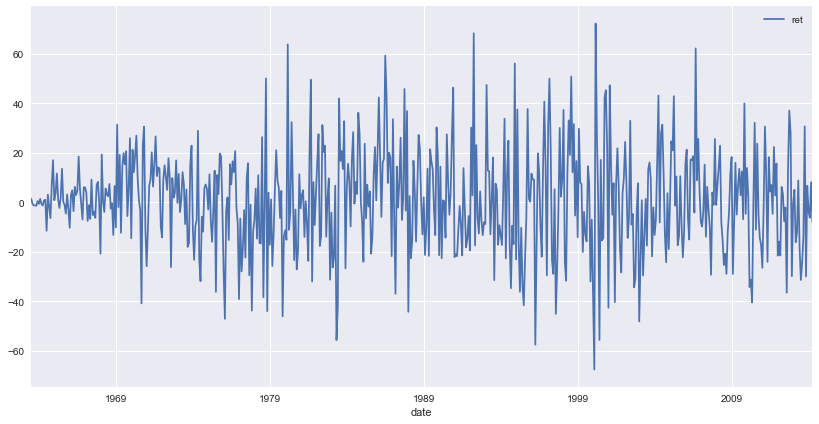

In [43]:
# Plot mean/total returns of subsample
date = crsp_df_subsample_200.index.get_level_values('date')
crsp_df_subsample_200.groupby(date).sum().plot(y=['ret'], figsize=(14,7))

## Overview

<AxesSubplot:title={'center':'title no. of permnos in data set'}, xlabel='date'>

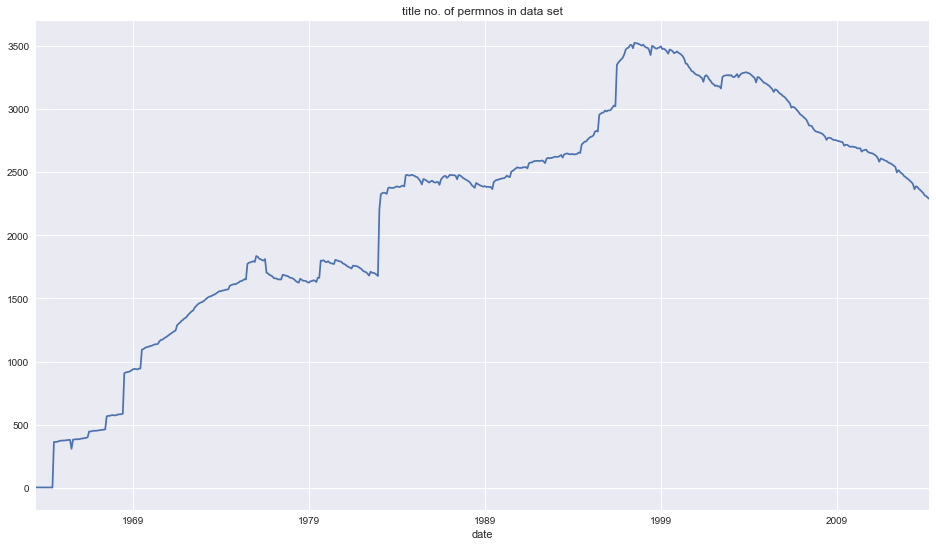

In [44]:
# count number of permnos per month
entries_per_month = crsp_df.groupby('date').count()
# plot by return
entries_per_month['ret'].plot(title="title no. of permnos in data set", figsize=(16,9))

## Feature selection
adopted from Markus Bilz

In [73]:
features_freyberger = ['d_shrout', 'd_so', 'investment', 'lme', 'lturnover', 'pm_adj', 'cum_return_1_0', 'cum_return_12_2', 'cum_return_12_7', 'rel_to_high_price', 'roc','suv', 'total_vol']
features_gbm = ['cum_return_1_0', 'cum_return_6_2', 'cum_return_12_2','cum_return_12_7', 'cum_return_36_13', 'investment', 'd_ceq', 'dpi2a','d_shrout', 'noa', 'ato', 'cto', 'd_dgm_dsales', 'eps', 'ipm', 'pcm','pm', 'pm_adj', 'prof', 'rna', 'roa', 'roe', 'roic', 's2c', 'at_adj','aoa', 'ol', 'oa', 'a2me', 'beme', 'beme_adj', 'c2d', 'd_so', 'debt2p','e2p', 'free_cf', 'ldp', 'nop', 'o2p', 'q', 's2p', 'sales_g', 'at','beta', 'beta_daily', 'dto', 'idio_vol', 'lme', 'lme_adj', 'lturnover','rel_to_high_price', 'ret_max', 'spread_mean', 'std_turn', 'std_volume','suv', 'total_vol', 'ret', 'yy', 'mm_cos', 'mm_sin', 'stock']
features_ae = ['e2p', 'beme', 'cum_return_12_2', 'cum_return_12_7', 'mm_sin', 'mm_cos', 'yy', 'dpi2a', 'ret', 'total_vol', 'noa', 'std_volume', 'cto']
features_rf = ['d_shrout', 'roe', 'oa', 'free_cf', 'nop', 'dpi2a', 'rna', 'ato', 'd_dgm_dsales', 'roc', 'ipm', 'spread_mean', 'dto', 'suv']

# Appendix

## Sample analysis

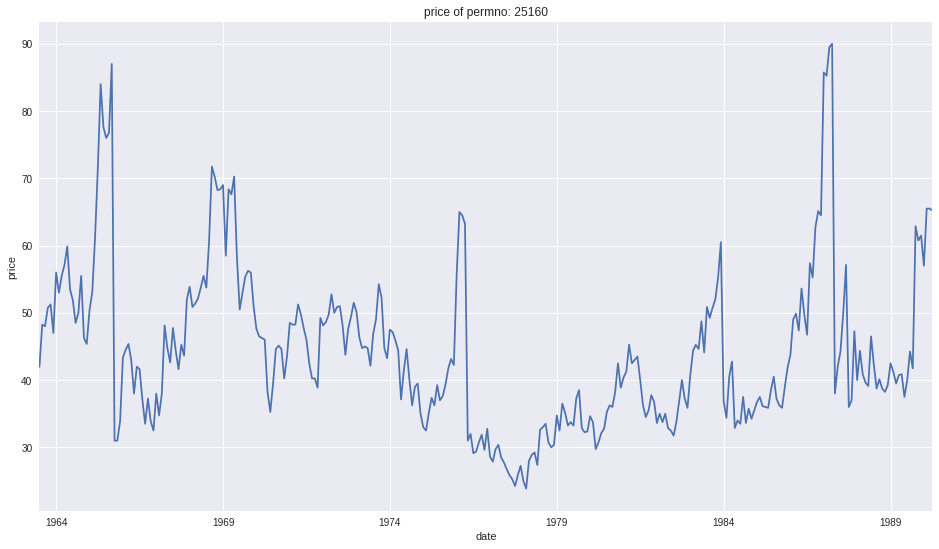

In [63]:
sample_permno = 25160

sample_firm_data = crsp_df.xs(sample_permno, level='permno')

sample_firm_data['prc'].plot(ylabel='price', title=f"price of permno: {sample_permno}", figsize=(16,9))

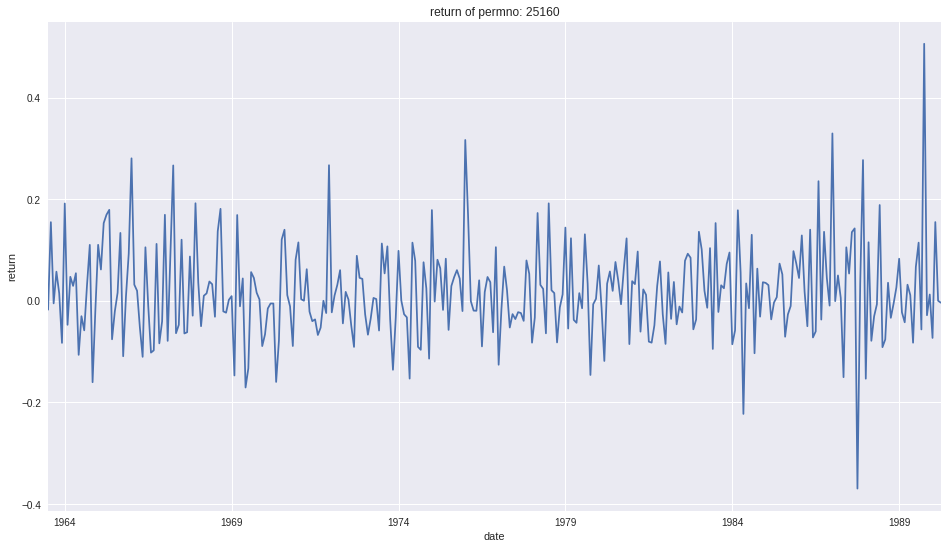

In [64]:
sample_firm_data['ret'].plot(ylabel='return', title=f"return of permno: {sample_permno}", figsize=(16,9))

Text(0.5, 1.0, 'return distribution of permno: 25160')

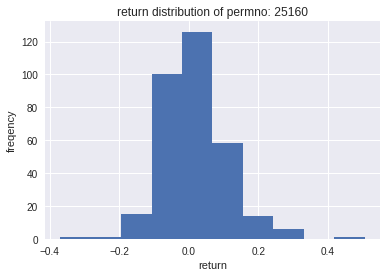

In [65]:
ax = sample_firm_data['ret'].hist()
ax.set_xlabel("return")
ax.set_ylabel("freqency")
ax.set_title(f"return distribution of permno: {sample_permno}")

### Test sample for stationarity

In [66]:
# test whether price is stationary by applying the Augmented Dickey Fuller Test
adf_test = adfuller(sample_firm_data['ret'])

# Equals MacKinnon's approximate p-value based on MacKinnon
p_vle = adf_test[1]

print(f"p value: {p_vle: .5f}")  

p value:  0.00000


### Test sample for normality

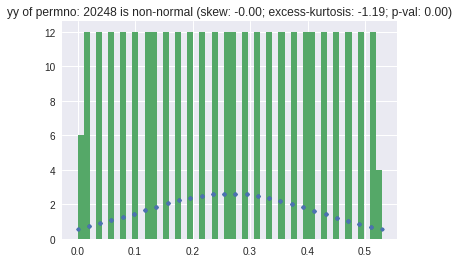

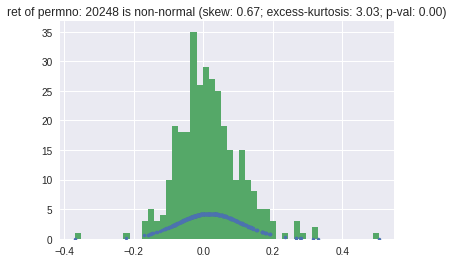

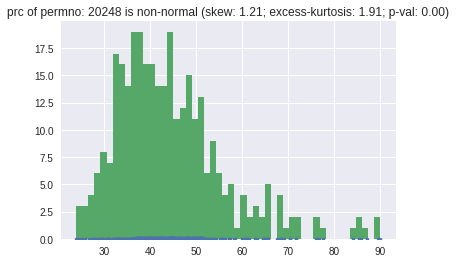

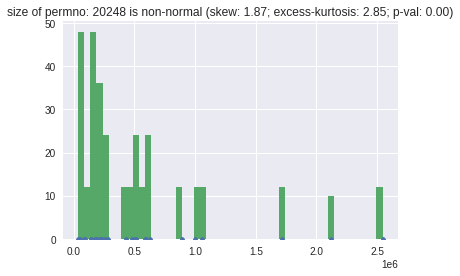

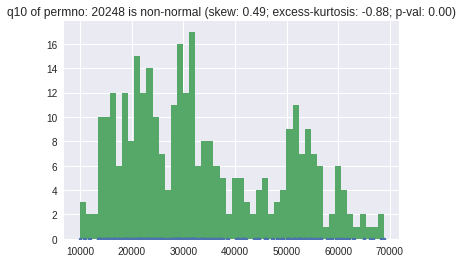

In [67]:
# change to -1 to include all colums.
limit = 5

for characteristic in sample_firm_data.iloc[:,0:limit]:
	series = sample_firm_data[characteristic]
	p_value = stats.shapiro(series)[1]
	# reject null hypothesis -> data is non-normal
	if p_value <= 0.05:
		
		# it's the excess kurtosis i. e. -3 subtracted
		excess_kurtosis = kurtosis(series)
		skewness = skew(series)
		fit = stats.norm.pdf(series, np.mean(series), np.std(series)) 
		
		# create plot of hist and normal distribution

		plt.plot(series, fit,'.',linewidth = 1)
		plt.hist(series, bins = 50)
		plt.title(f"{characteristic} of permno: {permno} is non-normal (skew: {skewness:.2f}; excess-kurtosis: {excess_kurtosis:.2f}; p-val: {p_value:.2f})")      
		plt.show()

**Insight** Data is not normally distributed. To limit the impact, apply rankwise standardization instead of standardization over the entire series. See also Gu et al. (2021; p. 8).

## Interests

In [68]:
def missing_index(series: pd.Series, freq="MS"):
    """
    function to test whether timeseries is complete
    """
    
    # Generate full list of dates e. g. 1965-01-01, 1996-02-01...
    # adapted from https://stackoverflow.com/a/34915951/5755604
    missing_dates = pd.date_range(series.index.min(), series.index.max(), freq=freq).difference(series.index)

    print(f"missing dates: {missing_dates}")

    # see if indices are missing
    print(f"no. of missing indices: {missing_dates.shape}")

    # see if there are null values
    print(f"no. of na values: {series.isna().sum()}")


The risk-free interest is estimated through yields of treasury bills provided by FRED.
Treasury bills with maturity in one month (DGS1MO) are only available until 2002. See [here.](https://fred.stlouisfed.org/series/DGS1MO)

Instead we chose the 3-mth treasury bill secondary market rate as it is available from Jan 1934 to Sep 2021 and convert it to a monthly rate See [here.](https://fred.stlouisfed.org/series/TB3MS)

Former student used 13 week rate with a conversion factor of 12. This might lead to a smaller excess return or overestimate of the risk-free return.

               TB1MS
DATE                
1963-08-01  0.010946
1963-09-01  0.011142
1963-10-01  0.011370
1963-11-01  0.011598
1963-12-01  0.011598


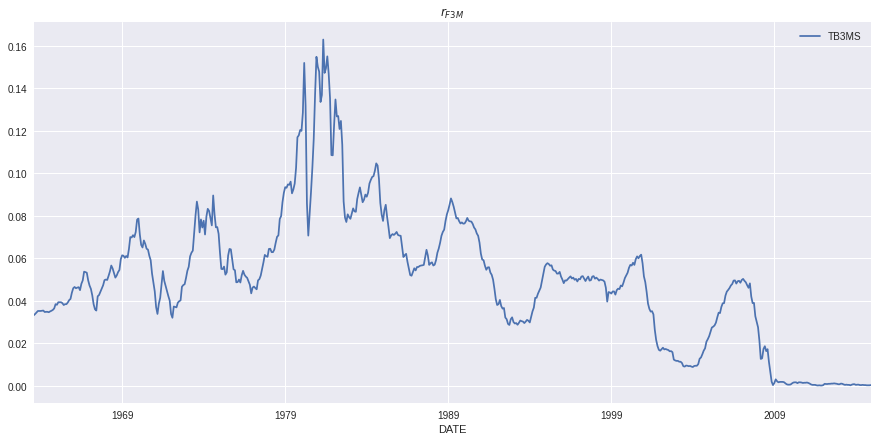

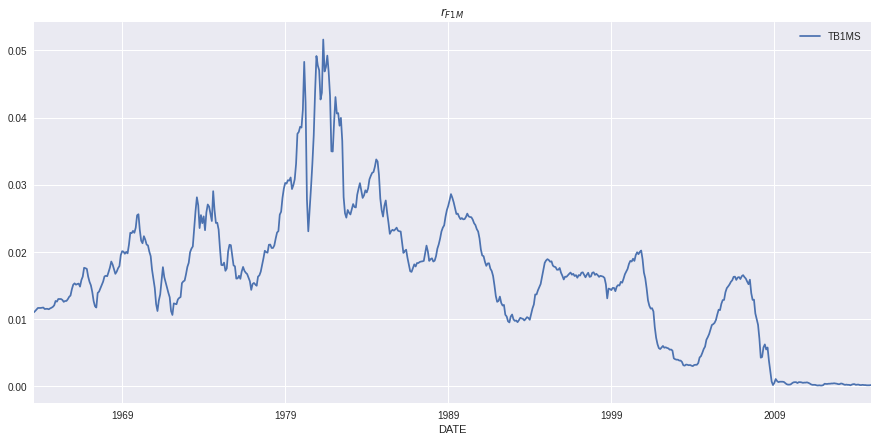

In [69]:

rf_3_mth = web.DataReader("TB3MS", "fred", start, end)

# convert to procent notation
# FIXME: Verify conversion is correct?
rf_3_mth *= 0.01

rf_3_mth.plot(title="$r_{F3M}$", figsize=(15,7))

# convert 3 mth rate to monthly rate
# see: https://quant.stackexchange.com/a/19202/38986

rf_1_mth = (1.0 + rf_3_mth)**(1/3) - 1

rf_1_mth.rename(columns={'TB3MS':'TB1MS'}, inplace=True)

print(rf_1_mth.head())

rf_1_mth.plot(title="$r_{F1M}$", figsize=(15,7))


In [70]:
missing_index(rf_1_mth)

missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')
no. of missing indices: (0,)
no. of na values: TB1MS    0
dtype: int64


In [71]:
rf_1_mth.to_pickle(f"{root_path}/rf_1_mth.pkl")

We also load the interest rates used in the previous year for comaparsion.

In [72]:
rf_12_mth_prev_year = pd.read_csv(f"{root_path}/risk_free_rate.csv")
rf_12_mth_prev_year.index = pd.PeriodIndex(rf_12_mth_prev_year['month'], freq="M")
# make full date
rf_12_mth_prev_year.index = rf_12_mth_prev_year.index.to_timestamp(how="start")
#rf_12_mth_prev_year.index = rf_12_mth_prev_year.index.date

rf_12_mth_prev_year.drop('month', axis=1, inplace=True)

# apply transformation as described above
rf_1_mth_prev_year = (1 + rf_12_mth_prev_year)**(1/12) - 1
rf_1_mth_prev_year.rename(columns={'rf':'RF (prev year)'}, inplace=True)
rf_1_mth_prev_year.index.name = 'Date'
rf_1_mth_prev_year = rf_1_mth_prev_year.asfreq('MS')
rf_1_mth_prev_year = rf_1_mth_prev_year.astype('float64')

rf_1_mth_prev_year.head()

,RF (prev year)
Date,
1962-01-01,0.002198
1962-02-01,0.002263
1962-03-01,NaN
1962-04-01,NaN
1962-05-01,0.002182


## Recession Indicator

Fred provides data on recessions in the US. For further details see [here.](https://fred.stlouisfed.org/series/USREC)

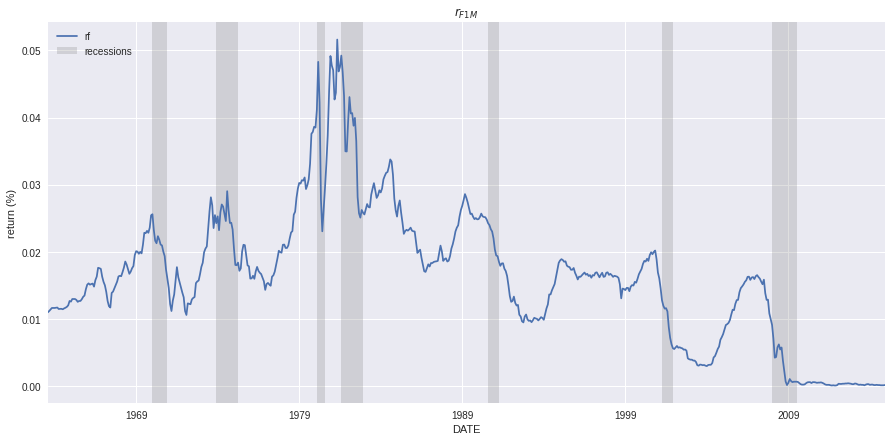

In [73]:
us_rec = web.DataReader("USREC", "fred", start, end)

# similar to code of prev. students code, but his code includes some errors -> compare plot in Gu et. al. paper and notebook
def plot_recessions():
    month = relativedelta(months=+1)
    for date, val in us_rec['USREC'].items():
        if val == 1:
            # if boolean = 1 -> print grey bar until next month
            plt.axvspan(date, date + month, facecolor='grey', edgecolor='none', alpha=.25)


rf_1_mth.plot(title="$r_{F1M}$", figsize=(15,7))
plot_recessions()
plt.legend(['rf','recessions'])
plt.ylabel("return (%)")
plt.show()

## Market Return

In [74]:
#sp500 = web.DataReader('^GSPC', 'yahoo', start="1962-01-01", end="2014-12-31")
#sp500.head()

# FIXME: Change for another source
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m', errors='coerce')
sp500 = pd.read_csv(f"{root_path}/r_mt.csv",index_col ="month", parse_dates=["month"], date_parser=dateparse)

sp500.head()

,r_mt
month,
1962-02-01,0.016270
1962-03-01,-0.005860
1962-04-01,-0.061970
1962-05-01,-0.085990
1962-06-01,-0.081838


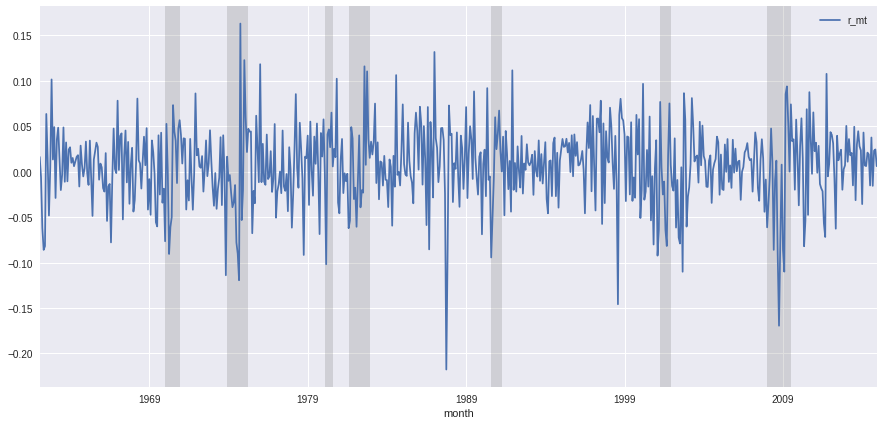

In [75]:
sp500.plot(figsize=(15,7))
plot_recessions()

In [76]:
missing_index(sp500)

missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')
no. of missing indices: (0,)
no. of na values: r_mt    0
dtype: int64


## Alternative Estimation of Market Excess returns and the RF returns

An alterantive approach is to use the risk-free return and the market excess return provided by Frama and French. For definition see Fama and French (1993). Data is available [here.](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Research).

In [78]:
# check for missing data in the market excess return
missing_index(mkt_rf_ff)
# check for missing data in the rf
missing_index(rf_1_mth_ff)

missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')
no. of missing indices: (0,)
no. of na values: 0
missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')
no. of missing indices: (0,)
no. of na values: 0


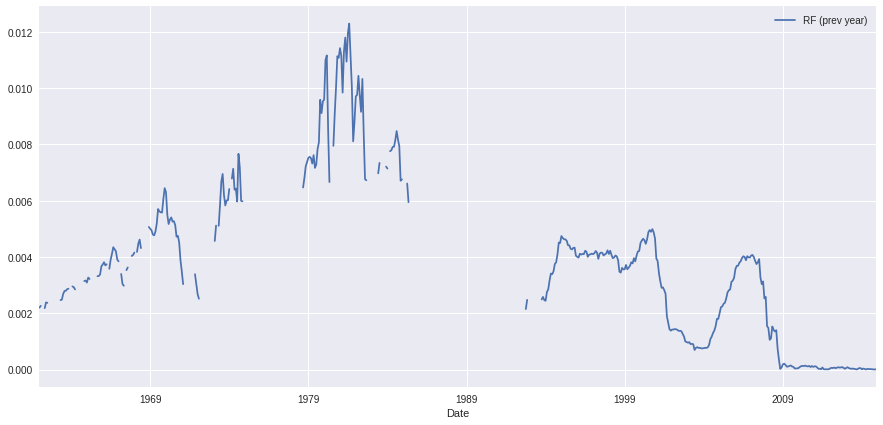

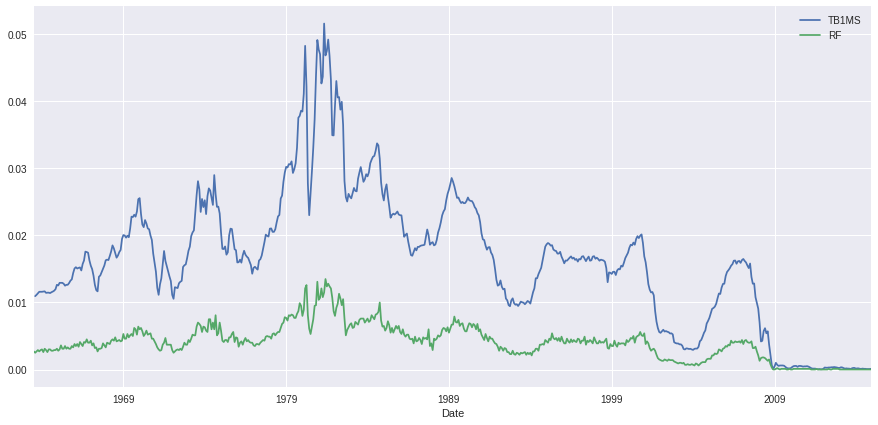

In [79]:
rf_1_mth_prev_year.plot(legend=".", figsize=(15,7))
rf_1_mth.plot(legend=".", figsize=(15,7))
rf_1_mth_ff.plot(legend=".", figsize=(15,7))
plt.show()

**Conclusion:** There are a lot of missing dates in the time series used in the previous year. Use the one provided by Fama / French instead.

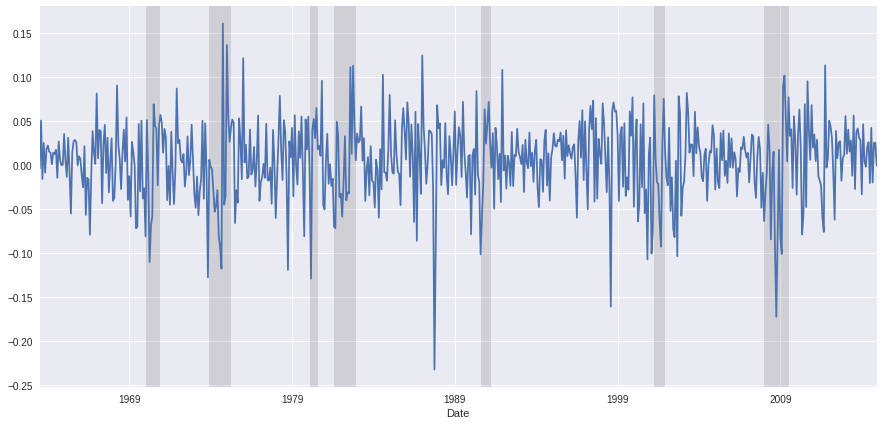

In [80]:
mkt_rf_ff.plot(figsize=(15,7))
plot_recessions()
plt.show()

## Bibliography

<div class="csl-bib-body" style="line-height: 1.35; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">CRSP. n.d. ‘DATA DESCRIPTIONS GUIDE CRSP US STOCK &amp; US INDEX DATABASES’. 130.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=DATA%20DESCRIPTIONS%20GUIDE%20CRSP%20US%20STOCK%20%26%20US%20INDEX%20DATABASES&amp;rft.aucorp=CRSP&amp;rft.au=undefined&amp;rft.pages=130&amp;rft.language=en"></span>
</div>

<br>

<div class="csl-entry">Fama, Eugene F., and Kenneth R. French. 1993. ‘Common Risk Factors in the Returns on Stocks and Bonds’. <i>Journal of Financial Economics</i> 33(1):3–56. doi: <a href="https://doi.org/10.1016/0304-405X(93)90023-5">10.1016/0304-405X(93)90023-5</a>.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2F10.1016%2F0304-405X(93)90023-5&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Common%20risk%20factors%20in%20the%20returns%20on%20stocks%20and%20bonds&amp;rft.jtitle=Journal%20of%20Financial%20Economics&amp;rft.stitle=Journal%20of%20Financial%20Economics&amp;rft.volume=33&amp;rft.issue=1&amp;rft.aufirst=Eugene%20F.&amp;rft.aulast=Fama&amp;rft.au=Eugene%20F.%20Fama&amp;rft.au=Kenneth%20R.%20French&amp;rft.date=1993-02&amp;rft.pages=3-56&amp;rft.spage=3&amp;rft.epage=56&amp;rft.issn=0304405X&amp;rft.language=en"></span>

<br>

<div class="csl-entry">Federal Reserve Bank of St. Louis. 1854. ‘NBER Based Recession Indicators for the United States from the Period Following the Peak through the Trough’. <i>FRED, Federal Reserve Bank of St. Louis</i>. Retrieved 31 October 2021 (<a href="https://fred.stlouisfed.org/series/USREC">https://fred.stlouisfed.org/series/USREC</a>).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=NBER%20based%20Recession%20Indicators%20for%20the%20United%20States%20from%20the%20Period%20following%20the%20Peak%20through%20the%20Trough&amp;rft.description=This%20time%20series%20is%20an%20interpretation%20of%20US%20Business%20Cycle%20Expansions%20and%20Contractions%20data%20provided%20by%20The%20National%20Bureau%20of%20Economic%20Research%20(http%3A%2F%2Fwww.nber.org%2Fcycles%2Fcyclesmain.html)%20(NBER).%20Our%20time%20series%20is%20composed%20of%20dummy%20variables%20that%20represent%20periods%20of%20expansion%20and%20recession.%20The%20NBER%20identifies%20months%20and%20quarters%20of%20turning%20points%20without%20designating%20a%20date%20within%20the%20period%20that%20turning%20points%20occurred.%20The%20dummy%20variable%20adopts%20an%20arbitrary%20convention%20that%20the%20turning%20point%20occurred%20at%20a%20specific%20date%20within%20the%20period.%20The%20arbitrary%20convention%20does%20not%20reflect%20any%20judgment%20on%20this%20issue%20by%20the%20NBER's%20Business%20Cycle%20Dating%20Committee.%20A%20value%20of%201%20is%20a%20recessionary%20period%2C%20while%20a%20value%20of%200%20is%20an%20expansionary%20period.%20For%20this%20time%20series%2C%20the%20recession%20begins%20the%20first%20day%20of%20the%20period%20following%20a%20peak%20and%20ends%20on%20the%20last%20day%20of%20the%20period%20of%20the%20trough.%20For%20more%20options%20on%20recession%20shading%2C%20see%20the%20notes%20and%20links%20below.%0A%0AThe%20recession%20shading%20data%20that%20we%20provide%20initially%20comes%20from%20the%20source%20as%20a%20list%20of%20dates%20that%20are%20either%20an%20economic%20peak%20or%20trough.%20We%20interpret%20dates%20into%20recession%20shading%20data%20using%20one%20of%20three%20arbitrary%20methods.%20All%20of%20our%20recession%20shading%20data%20is%20available%20using%20all%20three%20interpretations.%20The%20period%20between%20a%20peak%20and%20trough%20is%20always%20shaded%20as%20a%20recession.%20The%20peak%20and%20trough%20are%20collectively%20extrema.%20Depending%20on%20the%20application%2C%20the%20extrema%2C%20both%20individually%20and%20collectively%2C%20may%20be%20included%20in%20the%20recession%20period%20in%20whole%20or%20in%20part.%20In%20situations%20where%20a%20portion%20of%20a%20period%20is%20included%20in%20the%20recession%2C%20the%20whole%20period%20is%20deemed%20to%20be%20included%20in%20the%20recession%20period.%0A%0AThe%20first%20interpretation%2C%20known%20as%20the%20midpoint%20method%2C%20is%20to%20show%20a%20recession%20from%20the%20midpoint%20of%20the%20peak%20through%20the%20midpoint%20of%20the%20trough%20for%20monthly%20and%20quarterly%20data.%20For%20daily%20data%2C%20the%20recession%20begins%20on%20the%2015th%20of%20the%20month%20of%20the%20peak%20and%20ends%20on%20the%2015th%20of%20the%20month%20of%20the%20trough.%20Daily%20data%20is%20a%20disaggregation%20of%20monthly%20data.%20For%20monthly%20and%20quarterly%20data%2C%20the%20entire%20peak%20and%20trough%20periods%20are%20included%20in%20the%20recession%20shading.%20This%20method%20shows%20the%20maximum%20number%20of%20periods%20as%20a%20recession%20for%20monthly%20and%20quarterly%20data.%20The%20Federal%20Reserve%20Bank%20of%20St.%20Louis%20uses%20this%20method%20in%20its%20own%20publications.%20One%20version%20of%20this%20time%20series%20is%20represented%20using%20the%20midpoint%20method%20(https%3A%2F%2Ffred.stlouisfed.org%2Fseries%2FUSRECM)%20The%20second%20interpretation%2C%20known%20as%20the%20trough%20method%2C%20is%20to%20show%20a%20recession%20from%20the%20period%20following%20the%20peak%20through%20the%20trough%20(i.e.%20the%20peak%20is%20not%20included%20in%20the%20recession%20shading%2C%20but%20the%20trough%20is).%20For%20daily%20data%2C%20the%20recession%20begins%20on%20the%20first%20day%20of%20the%20first%20month%20following%20the%20peak%20and%20ends%20on%20the%20last%20day%20of%20the%20month%20of%20the%20trough.%20Daily%20data%20is%20a%20disaggregation%20of%20monthly%20data.%20The%20trough%20method%20is%20used%20when%20displaying%20data%20on%20FRED%20graphs.%20The%20trough%20method%20is%20used%20for%20this%20series.%0A%0AThe%20third%20interpretation%2C%20known%20as%20the%20peak%20method%2C%20is%20to%20show%20a%20recession%20from%20the%20period%20of%20the%20peak%20to%20the%20trough%20(i.e.%20the%20peak%20is%20included%20in%20the%20recession%20shading%2C%20but%20the%20trough%20is%20not).%20For%20daily%20data%2C%20the%20recession%20begins%20on%20the%20first%20day%20of%20the%20month%20of%20the%20peak%20and%20ends%20on%20the%20last%20day%20of%20the%20month%20preceding%20the%20trough.%20Daily%20data%20is%20a%20disaggregation%20of%20monthly%20data.%20Here%20is%20an%20example%20of%20this%20time%20series%20represented%20using%20the%20peak%20method%20(https%3A%2F%2Ffred.stlouisfed.org%2Fseries%2FUSRECP).&amp;rft.identifier=https%3A%2F%2Ffred.stlouisfed.org%2Fseries%2FUSREC&amp;rft.aucorp=Federal%20Reserve%20Bank%20of%20St.%20Louis&amp;rft.au=undefined&amp;rft.date=1854-12-01"></span>

<br>

<div class="csl-bib-body" style="line-height: 1.35; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">Freyberger, Joachim, Andreas Neuhierl, and Michael Weber. n.d. ‘Dissecting Characteristics Nonparametrically’. 68.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Dissecting%20Characteristics%20Nonparametrically&amp;rft.aufirst=Joachim&amp;rft.aulast=Freyberger&amp;rft.au=Joachim%20Freyberger&amp;rft.au=Andreas%20Neuhierl&amp;rft.au=Michael%20Weber&amp;rft.pages=68&amp;rft.language=en"></span>
</div>

<br>

<div class="csl-bib-body" style="line-height: 1.35; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">Gu, Shihao, Bryan Kelly, and Dacheng Xiu. 2020. ‘Empirical Asset Pricing via Machine Learning’ edited by A. Karolyi. <i>The Review of Financial Studies</i> 33(5):2223–73. doi: <a href="https://doi.org/10.1093/rfs/hhaa009">10.1093/rfs/hhaa009</a>.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2F10.1093%2Frfs%2Fhhaa009&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Empirical%20Asset%20Pricing%20via%20Machine%20Learning&amp;rft.jtitle=The%20Review%20of%20Financial%20Studies&amp;rft.volume=33&amp;rft.issue=5&amp;rft.aufirst=Shihao&amp;rft.aulast=Gu&amp;rft.au=Shihao%20Gu&amp;rft.au=Bryan%20Kelly&amp;rft.au=Dacheng%20Xiu&amp;rft.au=Andrew%20Karolyi&amp;rft.date=2020-05-01&amp;rft.pages=2223-2273&amp;rft.spage=2223&amp;rft.epage=2273&amp;rft.issn=0893-9454%2C%201465-7368&amp;rft.language=en"></span>
</div>

<br>

<div class="csl-bib-body" style="line-height: 1.35; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">Gu, Shihao, Bryan Kelly, and Dacheng Xiu. 2021. ‘Autoencoder Asset Pricing Models’. <i>Journal of Econometrics</i> 222(1):429–50. doi: <a href="https://doi.org/10.1016/j.jeconom.2020.07.009">10.1016/j.jeconom.2020.07.009</a>.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2F10.1016%2Fj.jeconom.2020.07.009&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Autoencoder%20asset%20pricing%20models&amp;rft.jtitle=Journal%20of%20Econometrics&amp;rft.stitle=Journal%20of%20Econometrics&amp;rft.volume=222&amp;rft.issue=1&amp;rft.aufirst=Shihao&amp;rft.aulast=Gu&amp;rft.au=Shihao%20Gu&amp;rft.au=Bryan%20Kelly&amp;rft.au=Dacheng%20Xiu&amp;rft.date=2021-05&amp;rft.pages=429-450&amp;rft.spage=429&amp;rft.epage=450&amp;rft.issn=03044076&amp;rft.language=en"></span>
</div>

<br>

<div class="csl-bib-body" style="line-height: 1.35; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">Ince, Ozgur S., and R. Burt Porter. 2006. ‘INDIVIDUAL EQUITY RETURN DATA FROM THOMSON DATASTREAM: HANDLE WITH CARE!’ <i>Journal of Financial Research</i> 29(4):463–79. doi: <a href="https://doi.org/10.1111/j.1475-6803.2006.00189.x">10.1111/j.1475-6803.2006.00189.x</a>.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2F10.1111%2Fj.1475-6803.2006.00189.x&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=INDIVIDUAL%20EQUITY%20RETURN%20DATA%20FROM%20THOMSON%20DATASTREAM%3A%20HANDLE%20WITH%20CARE!&amp;rft.jtitle=Journal%20of%20Financial%20Research&amp;rft.stitle=J%20Financial%20Res&amp;rft.volume=29&amp;rft.issue=4&amp;rft.aufirst=Ozgur%20S.&amp;rft.aulast=Ince&amp;rft.au=Ozgur%20S.%20Ince&amp;rft.au=R.%20Burt%20Porter&amp;rft.date=2006-12&amp;rft.pages=463-479&amp;rft.spage=463&amp;rft.epage=479&amp;rft.issn=0270-2592%2C%201475-6803&amp;rft.language=en"></span>
</div>
